<a href="https://colab.research.google.com/github/akaikim/Cyclistic-bike-share-analysis-case-study-with-Python/blob/main/Google_data_trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS CASE STUDY: "CYCLISTIC BIKE-SHARE" USING PYTHON
## CASE SCENARIO
Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, he wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, he will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve his recommendations, so they must be backed up with compelling data insights and professional data visualizations.
## ABOUT THE COMPANY
In 2016, Cyclistic launched a successful bike-share offering program. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## ASK
How do annual members and casual riders use Cyclistic bikes differently?
## PREPARE
Using Cyclistic’s historical trip data from the last 12 months (from January 2021 to December 2021) to analyze and identify trends. You can view the whole dataset [here](https://divvy-tripdata.s3.amazonaws.com/index.html) (Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).) This is public data that can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit from using riders’ personally identifiable information.


## **PROCESS**

### Loading Libraries

In [1]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
from pandas import read_csv
from pandas import set_option
from datetime import datetime
import seaborn as sns

### Loading Dataset

In [2]:
#Read csv file
%cd '/content/drive/MyDrive/data'
Jan = pd.read_csv('202101.csv')
Feb = pd.read_csv('202102.csv')
Mar = pd.read_csv('202103.csv')
Apr = pd.read_csv('202104.csv')
May = pd.read_csv('202105.csv')
Jun = pd.read_csv('202106.csv')
Jul = pd.read_csv('202107.csv')
Aug = pd.read_csv('202108.csv')
Sep = pd.read_csv('202109.csv')
Oct = pd.read_csv('202110.csv')
Nov = pd.read_csv('202111.csv')
Dec = pd.read_csv('202112.csv')

/content/drive/MyDrive/data


### Get a quick look of the dataset

In [3]:
#Display each column name and check for consistency
Jan.info()
Feb.info()
Mar.info()
Apr.info()
May.info()
Jun.info()
Jul.info()
Aug.info()
Sep.info()
Oct.info()
Nov.info()
Dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 colum

As we can see, all the datasets have the same amount of columns, same columns's name and type.

To make it easier to clean or analyst the data we need to combine 12 months of dataset into a larger dataset. In order to do this, I use the concat() function.

In [4]:
#Combine dataframes into a big dataset
Year2021 = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])
Year2021.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


### Data Cleaning


In [5]:
#Checking if any cells have missing value
Year2021.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

As you can see, we do have null value in  some columns: "*start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng.*"
Because of we focus on analyst the diffrent between annual members and casual riders use Cyclistic bikes, there will be no change if we remove those columns listed above and two additon columns: "*start_lat, start_lng*"

In [6]:
#Remove unnecessary columns
columns_drop = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng',  'start_lat', 'start_lng']
Year2021.drop(columns_drop, inplace= True, axis =1)
#After remove
Year2021.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual


In [7]:
#Check and remove duplicate values
print('Row of Data frame before: ', Year2021.shape[0])
Year2021.drop_duplicates(keep='first', inplace=True)
print('Row of Data frame after: ', Year2021.shape[0])

Row of Data frame before:  5595063
Row of Data frame after:  5595063


There is no duplicate rows



## ANALYZE
### Data Transform
In this step, we will change data format as well as create new columns for easier analysis in the later


In [8]:
#Convert to datetime format
Year2021['started_at'] = pd.to_datetime(Year2021['started_at'])
Year2021['ended_at'] = pd.to_datetime(Year2021['ended_at'])

In [9]:
#create a month column
Year2021['month'] = Year2021['started_at'].dt.month_name()


#create a day of week column
Year2021['day_of_week'] = Year2021['started_at'].dt.day_name()


#create an hour column
Year2021['hour'] = Year2021['started_at'].dt.hour
Year2021.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,month,day_of_week,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,January,Thursday,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,January,Thursday,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,January,Saturday,2


We need to create a ride length column but have to make sure that the value in the *'started_at'* columns is less than the *'ended_at'* column

In [10]:
#Removing started_at data that is greater than ended_at
Year2021 = Year2021[Year2021['started_at'] < Year2021['ended_at']]
print("Number of rows: " , Year2021.shape[0])

Number of rows:  5594410


In [11]:
#Add new column to calculate each ride length in mins
Year2021['ride_length (mins)'] = Year2021['ended_at'] - Year2021['started_at'] 
Year2021['ride_length (mins)'] = Year2021['ride_length (mins)'].astype('timedelta64[s]') #convert ride_length from format days H:M:S to second
Year2021['ride_length (mins)'] = Year2021['ride_length (mins)']/60 #convert to minutes

Year2021.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,month,day_of_week,hour,ride_length (mins)
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,January,Saturday,16,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,January,Wednesday,18,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,January,Thursday,22,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,January,Thursday,13,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,January,Saturday,2,0.716667


### Analyze Data
As our main task that to find the different between the casual and member riders, we are going to filter the data and compare two type of customer

In [12]:
#Total numbers of rides by casual and member
casual =  Year2021.loc[Year2021['member_casual'] == 'casual'] #create a data set of casual riders
member = Year2021.loc[Year2021['member_casual'] == 'member']  #create a data set of member riders

total_casual = casual['ride_id'].count()
total_member = member['ride_id'].count()

total_ride = pd.DataFrame([total_casual,total_member], columns = ['Number of ride',], index = ['casual','member'])      
total_ride

,Number of ride
casual,2528664
member,3065746


In [13]:
#Average ride length of casual and member
avg_casual = casual['ride_length (mins)'].mean()
avg_member = member['ride_length (mins)'].mean()

avg_ride = pd.DataFrame([avg_casual,avg_member], columns = ['Average ride length',], index = ['casual','member'])      
avg_ride           

,Average ride length
casual,32.005780
member,13.634545


In [14]:
#Total numbers of rideable type by casual and member
ride_type = pd.pivot_table(Year2021, values = 'ride_id', index = ['rideable_type', 'member_casual'], aggfunc= ['count'])
ride_type
ride_type = ride_type.astype(int)
ride_type

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1266527
              member         1984219
docked_bike   casual          312334
              member               1
electric_bike casual          949803
              member         1081526

In [15]:
#Total numbers of ride per month
ride_month = pd.pivot_table(Year2021, values = 'ride_id', index = ['month', 'member_casual'], aggfunc= ['count'], sort = False)
ride_month

count
                        ride_id
month     member_casual        
January   member          78711
          casual          18117
February  member          39488
          casual          10130
March     casual          84028
          member         144456
April     member         200602
          casual         136590
May       casual         256888
          member         274691
June      member         358893
          casual         370636
July      casual         442011
          member         380317
August    member         391637
          casual         412608
September casual         363840
          member         392200
October   member         373953
          casual         257203
November  casual         106884
          member         253008
December  member         177790
          casual          69729

In [16]:
#Total numbers of ride per day in week
ride_week = pd.pivot_table(Year2021, values = 'ride_id', index = ['day_of_week', 'member_casual'], aggfunc= ['count'])
ride_week

count
                          ride_id
day_of_week member_casual        
Friday      casual         364037
            member         446384
Monday      casual         286340
            member         416181
Saturday    casual         557934
            member         433014
Sunday      casual         481048
            member         376086
Thursday    casual         286038
            member         451490
Tuesday     casual         274357
            member         465474
Wednesday   casual         278910
            member         477117

In [17]:
#Total Number Of Rides Per Time In A Day
ride_hour = pd.pivot_table(Year2021, values = 'ride_id', index = ['hour', 'member_casual'], aggfunc= ['count'])
ride_hour

count
                   ride_id
hour member_casual        
0    casual          53912
     member          33134
1    casual          39238
     member          21900
2    casual          25556
     member          12458
3    casual          14073
     member           7160
4    casual           9953
     member           8143
5    casual          12546
     member          30037
6    casual          25729
     member          81833
7    casual          46712
     member         149681
8    casual          63529
     member         173234
9    casual          76155
     member         130844
10   casual         104682
     member         129235
11   casual         135910
     member         155306
12   casual         162056
     member         180644
13   casual         173416
     member         177879
14   casual         178457
     member         174702
15   casual         188601
     member         201066
16   casual         205271
     member         257509
17   casual         236510
     member         320258
18   casual         213798
     member         271410
19   casual         166282
     member         194251
20   casual         122097
     member         131618
21   casual         103802
     member          97183
22   casual          96302
     member          74570
23   casual          74077
     member          51691

In [18]:
#Average ride length per month
avg_month = pd.pivot_table(Year2021, values = 'ride_length (mins)', index = ['month', 'member_casual'], aggfunc= ['mean'], sort = False)
avg_month

mean
                        ride_length (mins)
month     member_casual                   
January   member                 12.872966
          casual                 25.684590
February  member                 18.023454
          casual                 49.378103
March     casual                 38.161002
          member                 13.970632
April     member                 14.690822
          casual                 38.026052
May       casual                 38.235133
          member                 14.640296
June      member                 14.678659
          casual                 37.125947
July      casual                 32.793512
          member                 14.240705
August    member                 14.102425
          casual                 28.790781
September casual                 27.818819
          member                 13.736577
October   member                 12.503105
          casual                 28.678317
November  casual                 23.135478
          member                 11.310117
December  member                 11.005682
          casual                 23.497323

In [19]:
#Average ride length per day of week
avg_week = pd.pivot_table(Year2021, values = 'ride_length (mins)', index = ['day_of_week', 'member_casual'], aggfunc= ['mean'])
avg_week

mean
                          ride_length (mins)
day_of_week member_casual                   
Friday      casual                 30.351768
            member                 13.326080
Monday      casual                 31.879122
            member                 13.248260
Saturday    casual                 34.709966
            member                 15.265522
Sunday      casual                 37.570956
            member                 15.659229
Thursday    casual                 27.705776
            member                 12.777033
Tuesday     casual                 27.975488
            member                 12.789084
Wednesday   casual                 27.661074
            member                 12.820207

In [20]:
#Average ride length per hour
avg_hour = pd.pivot_table(Year2021, values = 'ride_length (mins)', index = ['hour', 'member_casual'], aggfunc= ['mean'])
avg_hour

mean
                   ride_length (mins)
hour member_casual                   
0    casual                 34.173115
     member                 13.625335
1    casual                 37.074528
     member                 14.772904
2    casual                 43.262233
     member                 15.501532
3    casual                 44.847582
     member                 16.393026
4    casual                 46.763735
     member                 13.510164
5    casual                 23.673807
     member                 11.834923
6    casual                 21.268899
     member                 12.183736
7    casual                 20.955000
     member                 12.317167
8    casual                 24.030528
     member                 12.184069
9    casual                 28.453953
     member                 12.604476
10   casual                 33.316559
     member                 13.513490
11   casual                 33.850116
     member                 13.709039
12   casual                 33.397136
     member                 13.454293
13   casual                 34.455491
     member                 13.670836
14   casual                 34.750118
     member                 14.153172
15   casual                 34.010660
     member                 14.045994
16   casual                 31.578566
     member                 14.098751
17   casual                 29.786158
     member                 14.265058
18   casual                 29.904461
     member                 14.126185
19   casual                 30.332896
     member                 13.913071
20   casual                 32.076488
     member                 13.819923
21   casual                 32.226748
     member                 13.478909
22   casual                 32.382893
     member                 13.652938
23   casual                 33.480983
     member                 14.148999

## SHARE
Consider that we have performed some analysis and gained some insights into the data, it now time to create visualizations to share our finding.


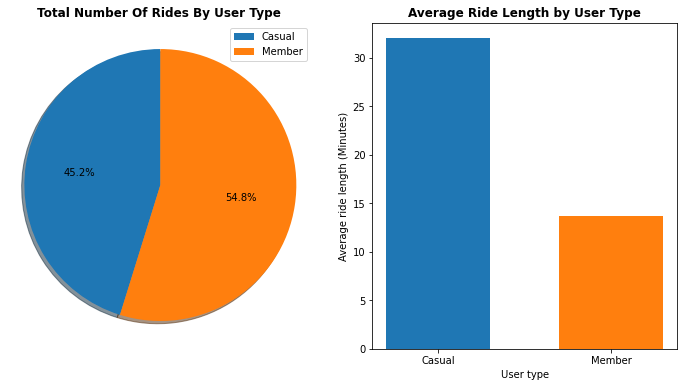

In [32]:
# Total Number Of Rides By User Type
f = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.pie([total_casual, total_member], autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['tab:blue', 'tab:orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Number Of Rides By User Type', fontweight="bold")
plt.legend(['Casual','Member'])

#Average Ride Length by User Type
plt.subplot(1, 2, 2)
plt.bar(['Casual','Member'], [avg_casual,avg_member], width=0.6, color = ['tab:blue', 'tab:orange'])
plt.title('Average Ride Length by User Type',fontweight="bold")
plt.xlabel('User type')
plt.ylabel('Average ride length (Minutes)')



plt.show()


The pie chart shows us that membership accounts for the majority of Cyclistic's system, accounting for **54.8%** of total users. This is also reasonable when member users will often be those who need to use them regularly for their daily travel.

Despite the larger number of users, the average cycling time of 'casual' users is nearly 2.5 times greater than that of member users. The average ride length is **32 minutes** for casual riders and **13 minutes** for members.

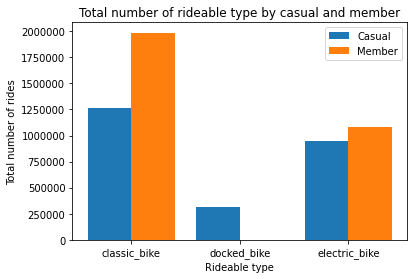

In [33]:
#Total number of rideable type by casual and member
ride_type = Year2021.groupby(['rideable_type','member_casual'], as_index = False)[['ride_id']].count()

ride_type_casual = ride_type[ride_type['member_casual'] == 'casual']['ride_id'].values.tolist()
ride_type_member = ride_type[ride_type['member_casual'] == 'member']['ride_id'].values.tolist()

x = np.arange(3)
y1 = ride_type_casual 
y2 = ride_type_member
width = 0.4
plt.bar(x-0.2, y1, width, color = 'tab:blue')
plt.bar(x+0.2, y2, width, color = 'tab:orange')
plt.xticks(x, ['classic_bike','docked_bike','electric_bike'])
plt.xlabel('Rideable type')
plt.ylabel('Total number of rides')
plt.legend(['Casual','Member'])
plt.title('Total number of rideable type by casual and member')
plt.ticklabel_format(style='plain',  axis='y')
plt.show()


Cyclistic company provides 3 types of car rental for users: *'classic_bike', 'docked_bike', 'electric_bike'*. Through the chart, we can see that classic_bike rental is the most popular among both members and casual users. Also in the chart, the docked_bike rental service has the lowest number of users, and there is only 1 rent by member user.

I want to find out more about why members don't like to rent this type anymore. So I downloaded the data of the previous 6 months from July 2020 to December 2020. Then perform the same data cleaning steps as above

In [23]:
%cd '/content/drive/MyDrive/data'
Jul_2020 = pd.read_csv('202007.csv')
Aug_2020 = pd.read_csv('202008.csv')
Sep_2020 = pd.read_csv('202009.csv')
Oct_2020 = pd.read_csv('202010.csv')
Nov_2020 = pd.read_csv('202011.csv')
Dec_2020 = pd.read_csv('202012.csv')

/content/drive/MyDrive/data


In [24]:
Year2020 = pd.concat([Jul_2020, Aug_2020, Sep_2020, Oct_2020, Nov_2020, Dec_2020, Jan])
Year2020.drop(columns_drop, inplace= True, axis =1)
Year2020['started_at'] = pd.to_datetime(Year2020['started_at'])
Year2020['ended_at'] = pd.to_datetime(Year2020['ended_at'])

Year2020['month'] = Year2020['started_at'].dt.month_name()


Year2020['day_of_week'] = Year2020['started_at'].dt.day_name()


Year2020['hour'] = Year2020['started_at'].dt.hour

Year2020.where(Year2020['started_at'] < Year2020['ended_at'], inplace= True)


Year2020['ride_length (mins)'] = Year2020['ended_at'] - Year2020['started_at'] 
Year2020['ride_length (mins)'] = Year2020['ride_length (mins)'].astype('timedelta64[s]')
Year2020['ride_length (mins)'] = Year2020['ride_length (mins)']/60 


       month  ride_id
3       July   279907
0     August   293163
6  September   231291
5    October   155156
4   November   104883
1   December     7800
2    January        1


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


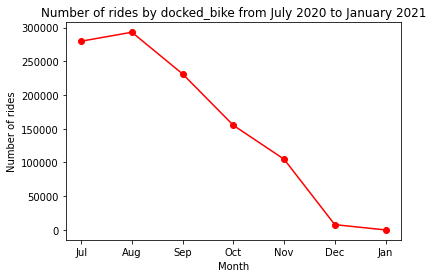

In [25]:
docked_bike_2 = Year2020.loc[(Year2020['rideable_type'] == 'docked_bike') & (Year2020['member_casual'] == 'member')]
docked_bike_month_2 = docked_bike_2.groupby(['month'], as_index = False)[['ride_id']].count()
#Sort value by month
sorter = ['July','August', 'September', 'October', 'November', 'December', 'January']
docked_bike_month_2.month = docked_bike_month_2.month.astype("category")
docked_bike_month_2.month.cat.set_categories(sorter, inplace=True)
docked_bike_month_2 = docked_bike_month_2.sort_values(["month"])
print(docked_bike_month_2)
#Visualize
x = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
y = docked_bike_month_2['ride_id'].tolist()
plt.plot(x, y, color='red', marker='o')
plt.title('Number of rides by docked_bike from July 2020 to January 2021')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.show()

It can be seen that in the second half of 2020, the docked_bike by member users rental service has a rapid decline, from nearly 300,000 rentals in August to 8000 times in December. This can be explained by one of two reasons: either simply because the member's preferences have changed, or because the company has a policy of gradually cutting down until it stops providing that type of service for member users. The second reason seems more reasonable when even if the customer's preferences change, it can also explain the fact that there is only 1 rental in 2021.

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


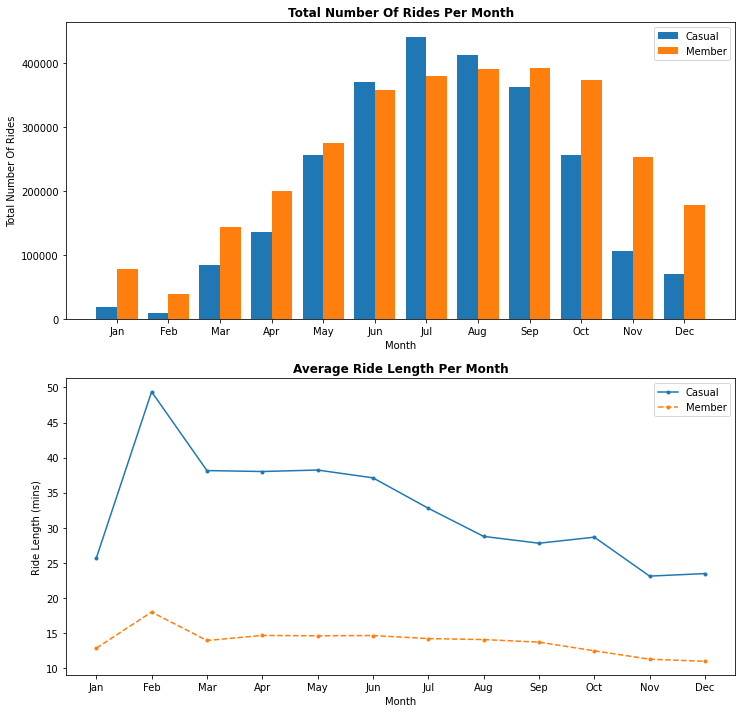

In [34]:
#Total Number Of Rides Per Month
ride_month = Year2021.groupby(['month','member_casual'], as_index = False)[['ride_id']].count()

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ride_month.month = ride_month.month.astype("category")
ride_month.month.cat.set_categories(sorter, inplace=True)
ride_month = ride_month.sort_values(["month"])

ride_month_casual = ride_month[ride_month['member_casual'] == 'casual']['ride_id'].values.tolist()
ride_month_member = ride_month[ride_month['member_casual'] == 'member']['ride_id'].values.tolist()

f= plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
x = np.arange(12)
y1 = ride_month_casual 
y2 = ride_month_member
width = 0.4

plt.bar(x-0.2, y1, width, color = 'tab:blue')
plt.bar(x+0.2, y2, width, color = 'tab:orange')
plt.xticks(x, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Total Number Of Rides')
plt.legend(['Casual','Member'])
plt.title('Total Number Of Rides Per Month' ,fontweight="bold")
plt.ticklabel_format(style='plain',  axis='y')


#Average Ride Length Per Month
avg_month = Year2021.groupby(['month','member_casual'], as_index = False)[['ride_length (mins)']].mean()

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_month.month = avg_month.month.astype("category")
avg_month.month.cat.set_categories(sorter, inplace=True)
avg_month = avg_month.sort_values(["month"])

avg_month_casual = avg_month[avg_month['member_casual'] == 'casual']['ride_length (mins)'].values.tolist()
avg_month_member = avg_month[avg_month['member_casual'] == 'member']['ride_length (mins)'].values.tolist()

plt.subplot(2,1,2)
x = np.arange(12)
y1 = avg_month_casual 
y2 = avg_month_member

plt.plot(x, y1, label = "casual", color = 'tab:blue', marker='.')
plt.plot(x, y2, label = "member", linestyle="--", color = 'tab:orange', marker='.')
plt.xticks(x,  ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Ride Length (mins)')
plt.legend(['Casual','Member'])
plt.title('Average Ride Length Per Month', fontweight="bold")
plt.ticklabel_format(style='plain',  axis='y')
plt.show()


Visualizing the number of bike rentals by month helps us to know the peak seasons of the year. The graphs of member and casual users both have similarities, for example, autumn is the peak months for both and then decreases during winter. Specifically, the peak month for member users falls in July with more than 440,000 rentals, while casual is August with about 390,000 rentals. The lowest month for member users and casual users both falls in February with 39,000 and 10,000 rentals respectively. The difference between the two groups is that member users only had a slight decrease in the winter months, but in terms of casual group, there was a significant decrease in the same time period. 

As for the visualization of the average time over the months, it helps us to know the user's behavior. Casual riders tend to take longer rides, but both member and casual share the same trend. Both reaching peak in February, the average cycling time of casual users is 49 minutes, and members users are 18 minutes. After that, it decreased slightly in the following months and reach its bottom in December with average of ride lenght of 23 minutes for casual users and 11 minutes for member users.

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


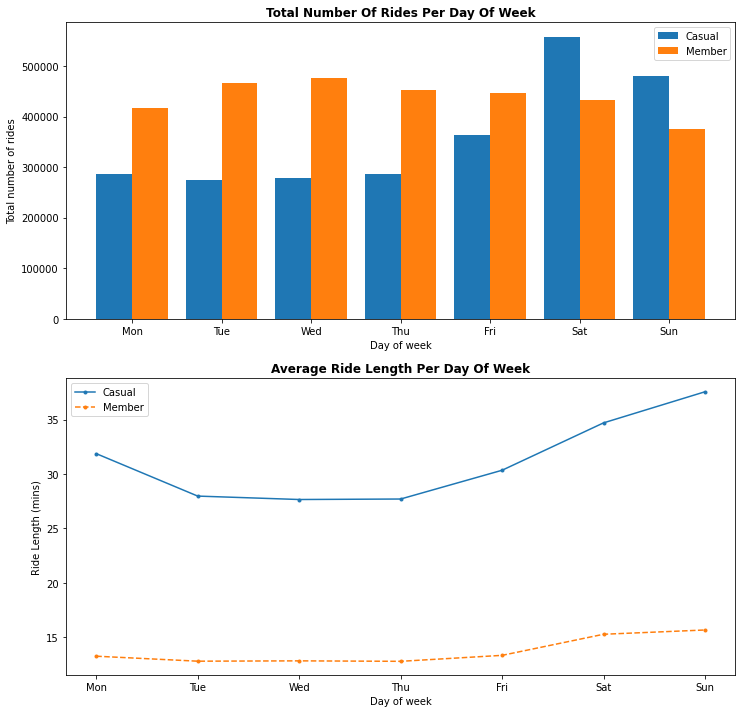

In [35]:
#Total Number of rides per day of week

ride_day_of_week = Year2021.groupby(['day_of_week','member_casual'], as_index = False)[['ride_id']].count()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ride_day_of_week.day_of_week = ride_day_of_week.day_of_week.astype("category")
ride_day_of_week.day_of_week.cat.set_categories(sorter, inplace=True)
ride_day_of_week = ride_day_of_week.sort_values(["day_of_week"])

ride_day_of_week_casual = ride_day_of_week[ride_day_of_week['member_casual'] == 'casual']['ride_id'].values.tolist()
ride_day_of_week_member = ride_day_of_week[ride_day_of_week['member_casual'] == 'member']['ride_id'].values.tolist()

f= plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
x = np.arange(7)
y1 = ride_day_of_week_casual 
y2 = ride_day_of_week_member
width = 0.4
plt.bar(x-0.2, y1, width, color = 'tab:blue')
plt.bar(x+0.2, y2, width, color = 'tab:orange')
plt.xticks(x, ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of week')
plt.ylabel('Total number of rides')
plt.legend(['Casual','Member'])
plt.title('Total Number Of Rides Per Day Of Week', fontweight="bold")
plt.ticklabel_format(style='plain',  axis='y')

#Average Ride Length Per day of week
avg_day_of_week = Year2021.groupby(['day_of_week','member_casual'], as_index = False)[['ride_length (mins)']].mean()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_day_of_week.day_of_week = avg_day_of_week.day_of_week.astype("category")
avg_day_of_week.day_of_week.cat.set_categories(sorter, inplace=True)
avg_day_of_week = avg_day_of_week.sort_values(["day_of_week"])

avg_day_of_week_casual = avg_day_of_week[avg_day_of_week['member_casual'] == 'casual']['ride_length (mins)'].values.tolist()
avg_day_of_week_member = avg_day_of_week[avg_day_of_week['member_casual'] == 'member']['ride_length (mins)'].values.tolist()

plt.subplot(2,1,2)
x = np.arange(7)
y1 = avg_day_of_week_casual 
y2 = avg_day_of_week_member

plt.plot(x, y1, label = "casual", color = 'tab:blue', marker='.')
plt.plot(x, y2, label = "member", linestyle="--", color = 'tab:orange', marker='.')
plt.xticks(x,  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of week')
plt.ylabel('Ride Length (mins)')
plt.legend(['Casual','Member'])
plt.title('Average Ride Length Per Day Of Week', fontweight="bold")
plt.ticklabel_format(style='plain',  axis='y')
plt.show()

In terms of the number of bicycle rentals per week, there is a clear difference between member users and casual users. For member users, there is consistency throughout the week. In contrast, the number of bike rentals of casual users on weekends is much higher than on weekdays

Like the average ride length by month chart, we can see a huge disparity between member and casual in average cycling time by day of the week. Casual users have longer trip times, with an average of 31 minutes on Mondays increasing to a peak of an average of 37 minutes on Sundays. On the other hand, membership users have a shorter average time and also have the same trend as casual users, starting on Monday with an average of 13 minutes and then steadily increasing to a peak of 15 minutes on Sunday.


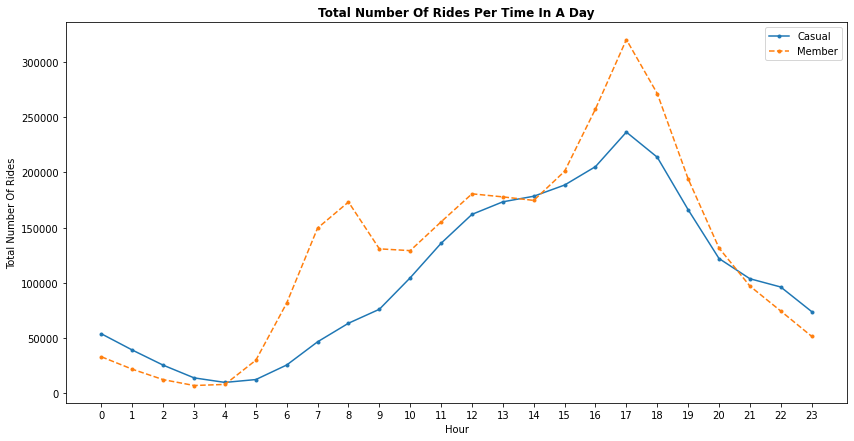

In [36]:
#Total Number Of Rides Per Time In A Day
ride_hour = Year2021.groupby(['hour','member_casual'], as_index = False)[['ride_id']].count()
ride_hour_casual = ride_hour[ride_hour['member_casual'] == 'casual']['ride_id'].values.tolist()
ride_hour_member = ride_hour[ride_hour['member_casual'] == 'member']['ride_id'].values.tolist()

x = np.arange(24)
y1 = ride_hour_casual 
y2 = ride_hour_member

plt.figure(figsize=(14,7))
plt.plot(x, y1, label = "casual", color = 'tab:blue', marker='.')
plt.plot(x, y2, label = "member", linestyle="--", color = 'tab:orange', marker='.')
plt.xticks(x)
plt.xlabel('Hour')
plt.ylabel('Total Number Of Rides')
plt.legend(['Casual','Member'])
plt.title('Total Number Of Rides Per Time In A Day', fontweight="bold")
plt.ticklabel_format(style='plain',  axis='y')
plt.show()


The line graph shows the total number of trips at each time frame of the day. Both user groups experienced a gradual increase in the number of trips starting at 5 am until peaking at 5 pm and starting to decrease throughout the day. In this chart, the number of tenants of the member users group is larger than that of the other group, which is explained by the majority of customers coming from member users.

##ACT
### Conclusion
* Member users are the main users of rental services, accounting for 54.8% of customers.
* The rental time of casual users is much longer than that of member users by about 2 times.
* The most rented bike's type in 2021 is classic bike for both member and casual users. Looks like the company has stopped providing docked bike rentals for member users.
* The summer and autumn months are the peak months for both user groups.
* The longest average ride length of the 2 groups of users both fell in February.
* For casual users, two weekends saw a spike in rentals. On the other hand, member users have stability throughout the week.
* Both groups have a longer average rental period on weekends.
* Both members and casual users have a gradually increasing number of rentals from 5 am and peak at 5 pm of the day.
* Combining the fact that member users have a stable number of bike rentals and a short average ride length during the weekdays, we can guess the target audience is students or people with fixed jobs. That serve their travel needs between work, school and home.
* As for casual users who tend to rent bicycles for longer time and especially those on summer days, weekends are great times for long one-time trips, sightseeing, travel, relaxation.

### Reconmendations
* Currently, there are many new ways of advertising but it is also very simple such as advertising through apps and websites. At the same time, you should also pay attention to the time to promote advertising and discount programs in the summer - autumn months, where the number of rentals is outstanding.
* It can be combined with gyms, sports centers to bring bike rental services that can be combined with their workouts, or give their members a discount when they sign up for our membership. Or discount for employees working in the local company.
* Offer short-term packages within a few months, especially in the summer months because these are the days when casual users have a sudden increase in rent; Or there are packages for rent only on weekends.
